# Assignment 3
### Due 9/23. Do four of five.

Sabine Segaloff

Begun: 9/16/25

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

#### Open the NHANES (or Ames prices or college completion datasets, if you prefer)

In [150]:
nhanes_path = '/Users/sabinesegaloff/Code/UVA_Fall_25/Understanding_Uncertainty_5030/data/nhanes_data_17_18.csv'
ndf = pd.read_csv(nhanes_path, low_memory=False)
# Setting low_memory=False instructs Pandas to read the entire file into memory before 
# inferring data types. This allows Pandas to determine the most appropriate and consistent
# data type for each column across the entire dataset, preventing mixed-type warnings and 
# ensuring data integrity. (Doing this since without it we get a DtypeWarning saying 142
# columns have mixed types)

ndf.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)

In [151]:
# Categorical variable 1: SchoolServesSchoolLunches
# Categorical variable 2: SchoolServeCompleteBreakfastEachDay

# (both are targeting people aged 4-19)

ndf[['SchoolServeCompleteBreakfastEachDay','SchoolServesSchoolLunches']]

,SchoolServeCompleteBreakfastEachDay,SchoolServesSchoolLunches
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1.0,1.0
...,...,...
8361,NaN,NaN
8362,NaN,NaN
8363,NaN,NaN
8364,1.0,1.0


In [152]:
# how many missing values for each variable?
print(ndf['SchoolServesSchoolLunches'].isna().value_counts())
print(ndf['SchoolServeCompleteBreakfastEachDay'].isna().value_counts())


SchoolServesSchoolLunches
True     6296
False    2070
Name: count, dtype: int64
SchoolServeCompleteBreakfastEachDay
True     6317
False    2049
Name: count, dtype: int64


So we are missing 6296 values for SchoolServesSchoolLunches and 6317 values for SchoolServeCompleteBreakfastEachDay

#### Compute a contingency table for your categorical $X$ and $Y$

In [153]:
pd.crosstab(ndf['SchoolServesSchoolLunches'], 
            ndf['SchoolServeCompleteBreakfastEachDay'], normalize='columns')

SchoolServeCompleteBreakfastEachDay,0.0,1.0
SchoolServesSchoolLunches,,
0.0,0.298077,0.003259
1.0,0.701923,0.996741


#### Discuss any interesting patterns (or lack of one) that you observe

Of schools that serve a complete breakfast each day, 99.6741% also serve school lunch. This is not surprising.

Also, it appears that there is at least one school serving a complete breakfast that is not serving lunch. I find that interesting. Am I reading that correctly?

## Exercise 2
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

#### Open the NHANES dataset

In [154]:
ndf.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)

In [155]:
# Categorical variable: SchoolLunchFreeReducedOrFullPrice
# Numeric Variable: OfTimesweekGetSchoolLunch

# (both are targeting people aged 4-19)

ndf[['SchoolLunchFreeReducedOrFullPrice','OfTimesweekGetSchoolLunch']]

,SchoolLunchFreeReducedOrFullPrice,OfTimesweekGetSchoolLunch
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,Reduced price,5.0
...,...,...
8361,NaN,NaN
8362,NaN,NaN
8363,NaN,NaN
8364,Full price,3.0


In [156]:
# how many missing values for each variable?
print(ndf['SchoolLunchFreeReducedOrFullPrice'].isna().value_counts())
print(ndf['OfTimesweekGetSchoolLunch'].isna().value_counts())

SchoolLunchFreeReducedOrFullPrice
True     6731
False    1635
Name: count, dtype: int64
OfTimesweekGetSchoolLunch
True     6366
False    2000
Name: count, dtype: int64


So we are missing 6731 values for SchoolLunchFreeReducedOrFullPrice and 6366 values for OfTimesweekGetSchoolLunch

#### Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$

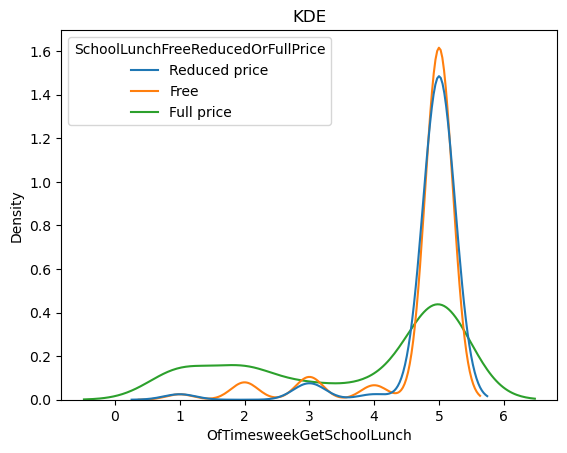

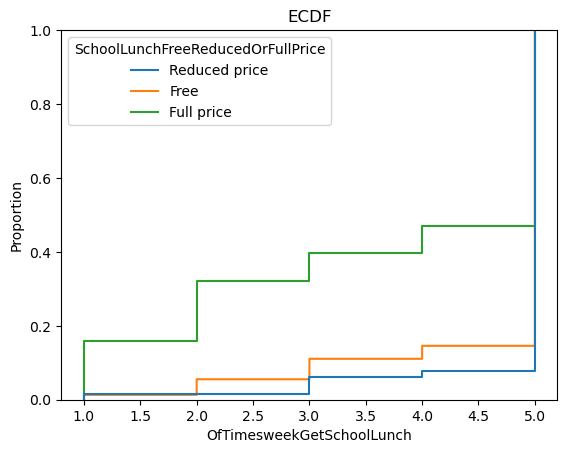

OfTimesweekGetSchoolLunch            \
                                                      count      mean   
SchoolLunchFreeReducedOrFullPrice                                       
Free                                                 1138.0  4.674868   
Full price                                            369.0  3.653117   
Reduced price                                         128.0  4.828125   

                                                                      
                                        std  min  25%  50%  75%  max  
SchoolLunchFreeReducedOrFullPrice                                     
Free                               0.861418  1.0  5.0  5.0  5.0  5.0  
Full price                         1.606372  1.0  2.0  5.0  5.0  5.0  
Reduced price                      0.653391  1.0  5.0  5.0  5.0  5.0

In [157]:
lunchcost = 'SchoolLunchFreeReducedOrFullPrice'

sns.kdeplot( data=ndf, x='OfTimesweekGetSchoolLunch', hue=lunchcost, common_norm=False ).set(title='KDE') # common_norm=False means each curve is normalized independently
plt.show()
sns.ecdfplot( data=ndf, x='OfTimesweekGetSchoolLunch', hue=lunchcost).set(title='ECDF')
plt.show()
ndf.loc[:,['OfTimesweekGetSchoolLunch', lunchcost]].groupby(lunchcost).describe()

# SHOULD THIS BE LOG of timesweek or not?

#### Discuss any interesting patterns (or lack of one) that you observe

In the plots above, we can see that the number of times a child gets a school lunch is more likely to be 5 if the school offers free or reduced price lunch.

## Exercise 3 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

- To minimize the mean squared error function, we start by taking the first derivative with respect to our prediction, $\hat{y}(z)$. Then we'll set that derivative to zero and then solve for $\hat{y}(z)$. Our goal is to find the value of $\hat{y}(z)$ that minimizes the function.

- Substitute $w$ for the kernel term for ease of reading here.

$$
\frac{\partial}{\partial \hat{y}(z)}MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \frac{\partial}{\partial \hat{y}(z)}\left[\left\lbrace y_i - \hat{y}(z) \right\rbrace^2\right] \frac{1}{h}w
$$

- Take the partial derivative of the mean squared error function with respect to $\hat{y}(z)$ (reminder, treat all the other variables as constants while differentiating):

$$
\frac{\partial}{\partial \hat{y}(z)}MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \frac{\partial}{\partial \hat{y}(z)}\left[\left\lbrace y_i - \hat{y}(z) \right\rbrace^2\right] \frac{1}{h}w
$$

- Use the chain rule on the squared term $\left\lbrace y_i - \hat{y}(z) \right\rbrace^2$ (looking at the squaring as the outer function) and get $2\left( y_i - \hat{y}(z) \right)$ for the derivative of the outer function. Then we multiply by the derivative of the inner function, which is $-1$ because $y_i$ gets treated as a constant and the derivative of $-\hat{y}(z)$ with respect to itself is $-1$. So we end up with $-2\left( y_i - \hat{y}(z) \right)$. Then we plug back in:

$$
\frac{\partial}{\partial \hat{y}(z)}MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N -2\left( y_i - \hat{y}(z) \right) \frac{1}{h}w
$$

- Find the minimum by setting the derivative equal to zero.

$$
\dfrac{1}{N} \sum_{i=1}^N -2\left( y_i - \hat{y}(z) \right) \frac{1}{h}w = 0
$$

- We know that $N$ (number of data points) is a positive integer since we can't have a negative number of them and if we had 0, we'd have no dataset. We also know that $h$ (bandwidth) cannot be zero because that would make the KDE undefined. Since we thus know that $-\dfrac{2}{Nh}$ is non-zero, we can divide both sides of the equation by $-\dfrac{2}{Nh}$. Now we have:

$$
\sum_{i=1}^N \left[\left( y_i - \hat{y}(z) \right) w\right] = 0
$$

- It's now time to solve for $\hat{y}(z)$, our predictor. First, we'll multiply the kernel by the $\left( y_i - \hat{y}(z) \right)$ expression.

$$
\sum_{i=1}^N \left[ y_i w - \hat{y}(z) w\right] = 0
$$

- Now we split the summation into two.

$$
\sum_{i=1}^N y_i w - \sum_{i=1}^N\hat{y}(z) w = 0
$$

- Since $\hat{y}(z)$ doesn't depend on the summation index $i$ we can pull it out of the second sum.

$$
\sum_{i=1}^N y_i w - \hat{y}(z)\sum_{i=1}^N w = 0
$$

- Then rearrange the equation to help isolate $\hat{y}(z)$.

$$
\hat{y}(z)\sum_{i=1}^N w = \sum_{i=1}^N y_i w
$$

- Then, divide both sides by $\sum_{i=1}^N w$.

$$
\hat{y}(z) = \frac{\sum_{i=1}^N y_i w}{\sum_{i=1}^N w}
$$

- Finally, multiply the right hand side of the equation by $\frac{\frac{1}{Nh}}{\frac{1}{Nh}}$ and plug the kernel term back in.

$$
\hat{y}(z) = \frac{\frac{1}{N}\sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N}\sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}
$$

**This is the Naradaya-Watson / Local Constant Least Squares regression**

## Exercise 4 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

#### Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.

In [158]:
# done while referencing the lcls function in the 02 using information notes

def lcls(x, y, kernel_type, h = None, plot = True, predictor = 'predictor',target = 'target'):
    '''Computes Local Constant Least Squares (LCLS)/Naradaya-Watson estimator with Silverman bandwidth.
    
        Parameters:
        x : array-like object with shape (n,)
            The independent variable.
        y : array-like object with shape (n,)
            The dependent variable.
        h : float
            The bandwidth parameter. Defaults to Silverman bandwidth.
        kernel_type : string
            The type of kernel to use. Must be one of 'gaussian', 'uniform', 'triangular', or 'epanechnikov'.
        plot : boolean, optional.
            If True, plots the estimated function.
        predictor : string
            The name of the independent variable.
        target : string
            The name of the dependent variable.

    '''
    # make sure x and y are numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    n = len(x) # number of observations
    grid = np.sort(np.unique(x)) # extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # compute kernel weights
    # compute standardized distance matrix 'u'
    dist = x.reshape(-1,1) - grid.reshape(1,-1)
    u = dist / h

    # apply kernel function to u
    if kernel_type == 'gaussian':
        K = np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi) # supports (-infinity, infinity)
    elif kernel_type == 'uniform':
        K = 0.5 * (np.abs(u) <= 1) # only supports [-1,1]
    elif kernel_type == 'triangular':
        K = (1 - np.abs(u)) * (np.abs(u) <= 1) # only supports [-1,1]
    elif kernel_type == 'epanechnikov':
        K = (3/4) * (1 - u**2) * (np.abs(u) <= 1) # only supports [-1,1]
    else:
        print("Unsupported kernel.")

    # compute lcls estimator
    numerator = y@K # Compute numerator (is this the weighted sum of y for each grid point?)
    denominator = np.sum(K,axis=0) # Compute denominator (is this the sum of the weights for each grid point?)
    y_hat = numerator/denominator # Compute estimator

    # plot results
    if plot:
        # create dummy dataframe for plotting
        df = pd.DataFrame({f'{target}': y, f'{predictor}': x})
        sns.scatterplot(data=df, y=f'{target}', x=f'{predictor}',alpha=.15)
        sns.lineplot(x=grid,y=y_hat, color='orange')
        plt.title('LCLS Estimate')
        plt.show()

    return y_hat, grid

#### From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

Computed bandwidth is: 83.92152075315373


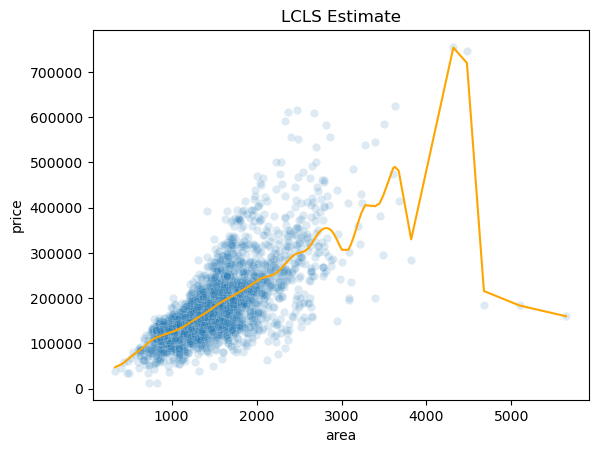

In [159]:
# iowa = pd.read_csv('/Users/sabinesegaloff/Code/UVA_Fall_25/Understanding_Uncertainty_5030/data/iowa.csv')
# x = iowa['State Bottle Cost']
# y = iowa['State Bottle Retail']

ames = pd.read_csv('/Users/sabinesegaloff/Code/UVA_Fall_25/Understanding_Uncertainty_5030/data/ames_prices.csv')
x = ames['area']
y = ames['price']

y_hat, grid = lcls(x, y, h=None, kernel_type='gaussian', plot=True, predictor='area', target='price')


Amazing it looks like the one from the notes! (I chose this same data to see if I did it right)

It appears that, before getting into the outliers, there is an almost linear relationship between price and area.

## Exercise 5 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome